In [1]:
from IPython.display import display, Markdown, Latex

from product import Option
from strategy import *
from euronext import Page
from graph import Graph

g=Graph(4800, 5500, 25)
p = Page(ticker_idx=1)
p.fetch()
options = p.scrap_options()
call = p.call
put = p.put
for k, o in p.call.items():
    o.multiplier=10
for k, o in p.put.items():
    o.multiplier=10


In [ ]:
butterfly = Butterfly(call[5000], call[5075], call[5150])
g.profit_strategy(butterfly)
print('Cost-Butterfly : {:0.02f}€'.format(butterfly.cost()))
g.display_summary(butterfly)

In [ ]:
g.profit_rainbow(call.values(), 'short', title='Call Rainbow')

In [ ]:
from graph import rainbow_color

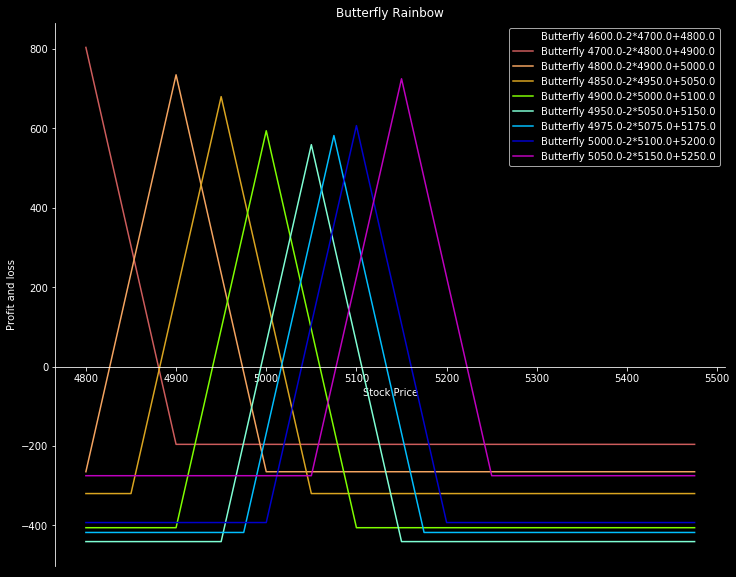

In [10]:
def explorator(g, list_call, step=50):
    strikes = [o.strike for o in call.values()]
    by_strike = dict(zip(strikes, list_call))
    bfs = []
    for i, strike_a in enumerate(strikes[:-2]):
        strike_b = strike_a + step
        strike_c = strike_b + step
        if (strike_b not in strikes or
            strike_c not in strikes):
            continue
        a=by_strike[strike_a]
        b=by_strike[strike_b]
        c=by_strike[strike_c]
        bfs.append(Butterfly(a, b, c))
    g.profit_rainbow(bfs, 'long', title='Butterfly Rainbow')
graph_search(g, call.values(), step=100)